# Demo notebook of the PulseBuilder_v3

In [2]:
from pyHegel import *
from pyHegel.commands import *
from pyHegel.instruments import *

awg = instruments.tektronix.tektronix_AWG('TCPIP0::AWG5200-XXXX.mshome.net::inst0::INSTR')
rto = instruments.rohdeschwarz.rs_rto_scope('USB0::0x0AAD::0x0197::1329.7002k14-300206::INSTR')

Fixing mpl_toolkit log scale transform bug of 2.2.x


C:\Codes\QIQSS-CODE\CodePulse\v3
Running under ipython
Running under ipython remote kernel
inject_wait (0.005,) 0.002
readout (0.0025,) 0.007
empty (0,) 0.007
{'wait_time': 0.002, 'constant_slope': [('readout', 0.02)], 'repeat': 10, 'name': 'single_shot_sweep', 'param_to_change': ['value'], 'name_to_change': ['readout'], 'values_iter': [(0.0, 0.005)], 'compensate': -0.005}
Qt loop already working


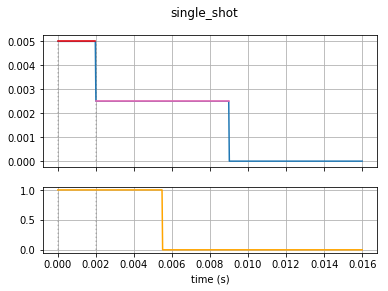

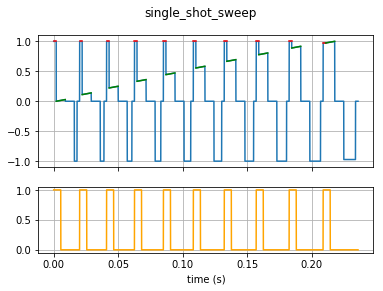

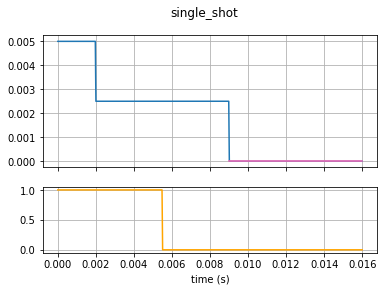

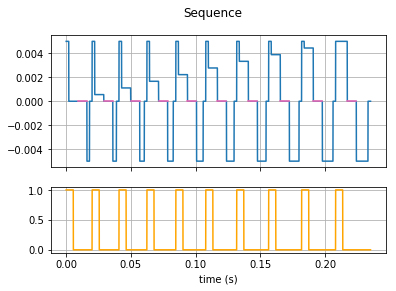

sine_0 (1, 1, 0, 0) 1
sine_0 (1, 1, 0, 0) 1


In [2]:
%cd C:\Codes\QIQSS-CODE\CodePulse\v3
%run -i pulse_v3.py

sample_rate = 32e3

# A Segment is a combination of AtomSegment
# We insert AtomSegment in a Segment with:
# segment.insert(Atom) or,
# segment.insertNew(AtomType, (args), duration, name) or,
# segment.insertStep([values], [durations], [names]:optional)

#TODO: testcase for adding the same atom several time
single_shot = Segment('single_shot')
single_shot.insertStep([0.005, 0.0025, 0], 
                       [2e-3, 7e-3, 7e-3], 
                       ['inject_wait', 'readout', 'empty'])
single_shot.mark('inject_wait')
single_shot.mark('readout', (0, 0.5))

pulseDraw(single_shot, sample_rate,
          highlight_atoms=[('inject_wait','red'), ('readout','hotpink')],
          vert_lines=True)

multiple_shot = single_shot.makeVaryingSequence(10,
    ['readout'], ['value'], [(0.,0.005)],
    wait_time=0.002, constant_slope=[('readout',0.02)], compensate=-0.005,
    name='single_shot_sweep')
pulseDraw(multiple_shot, sample_rate, normalize=True,
          highlight_atoms=[('inject_wait','red'), ('readout','green')])

#sendSequence(awg, multiple_shot, sample_rate, force=True)
#awg.output_en.set(True)
#awg.run()
import PulseBuilder
PulseBuilder.start(multiple_shot, sample_rate=sample_rate)

In [3]:
multiple_shot.locals()

AttributeError: 'Sequence' object has no attribute 'locals'